<a href="https://colab.research.google.com/github/ngzhiwei517/Machine_Learning_Self-Learn/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

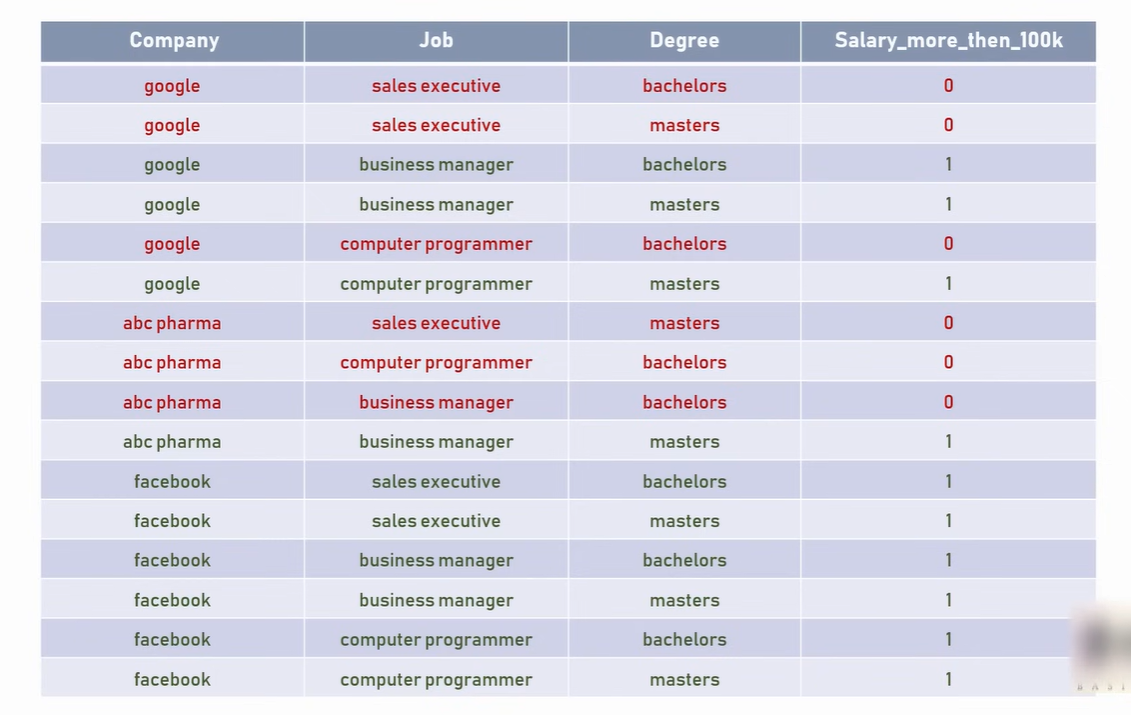

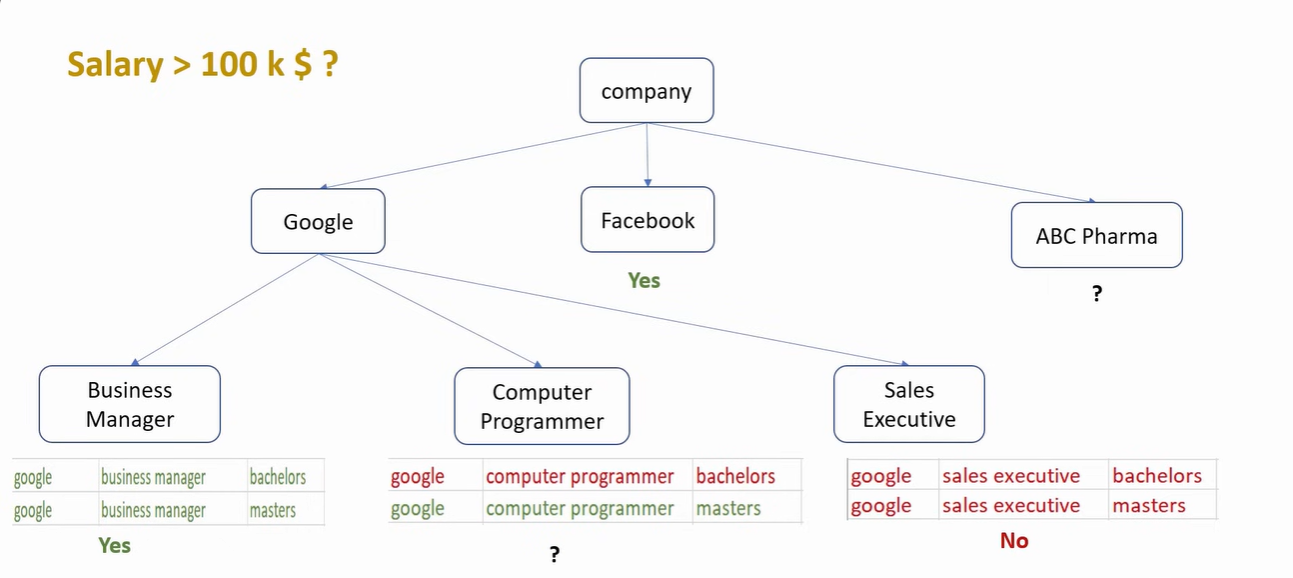

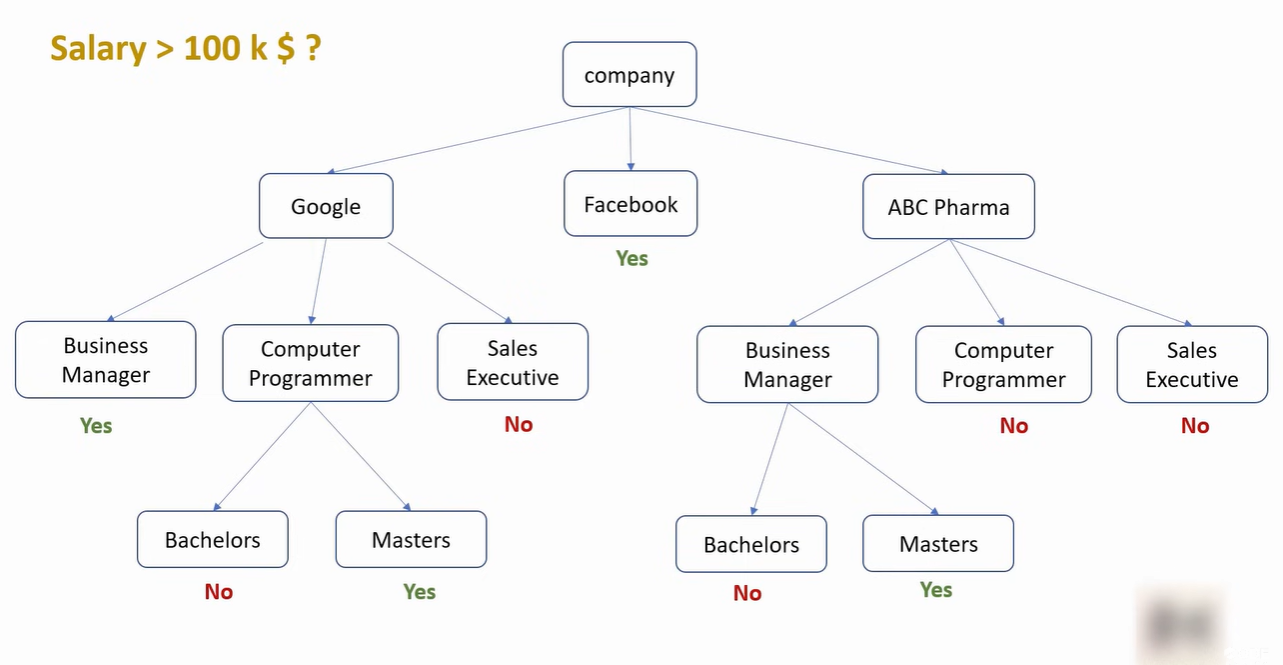

In [ ]:
import pandas as pd
df = pd.read_csv("/content/salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [ ]:
input=df.drop('salary_more_then_100k',axis='columns')
target=df['salary_more_then_100k']

In [ ]:
target

,salary_more_then_100k
0,0
1,0
2,1
3,1
4,0
5,1
6,0
7,0
8,0
9,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [ ]:
input['company_n']=le_company.fit_transform(input['company'])
input['job_n']=le_job.fit_transform(input['job'])
input['degree_n']=le_degree.fit_transform(input['degree'])

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [ ]:
input_n=input.drop(['company','job','degree'],axis='columns')
input_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(input_n,target)

DecisionTreeClassifier()

In [ ]:
model.score(input_n,target)

1.0

In [ ]:
model.predict([[2,2,1]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])



---
#Exercise

In this file using following columns build a model to predict if person would survive or not,

1. Pclass
2. Sex
3. Age
4. Fare

Calculate score of your model

In [ ]:
a_df=pd.read_csv('/content/titanic.csv')
a_df



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
inputs=a_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')

In [ ]:
inputs=inputs.drop('Survived',axis='columns')


In [ ]:
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [ ]:
target=a_df['Survived']
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
inputs.Sex=inputs.Sex.map({'male':1,'female':0})
inputs

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,NaN,23.4500
889,1,1,26.0,30.0000


In [ ]:
inputs.Age[:10]


,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0
7,2.0
8,27.0
9,14.0


In [ ]:
inputs.Age=inputs.Age.fillna(inputs.Age.mean())

In [ ]:
inputs[:10]

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,0,38.000000,71.2833
2,3,0,26.000000,7.9250
3,1,0,35.000000,53.1000
4,3,1,35.000000,8.0500
5,3,1,29.699118,8.4583
6,1,1,54.000000,51.8625
7,3,1,2.000000,21.0750
8,3,0,27.000000,11.1333
9,2,0,14.000000,30.0708


In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(inputs,target)

DecisionTreeClassifier()

In [ ]:
model.predict([[1,0,38,71.2833]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [ ]:
len(X_train)

712

In [ ]:
len(X_test)

179

In [ ]:

model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
model.score(X_test,y_test)

0.7541899441340782